Using agents column: Have you ever written an `agents.md`, modified your `.claude` directory, or added context specifically for agents in other way?


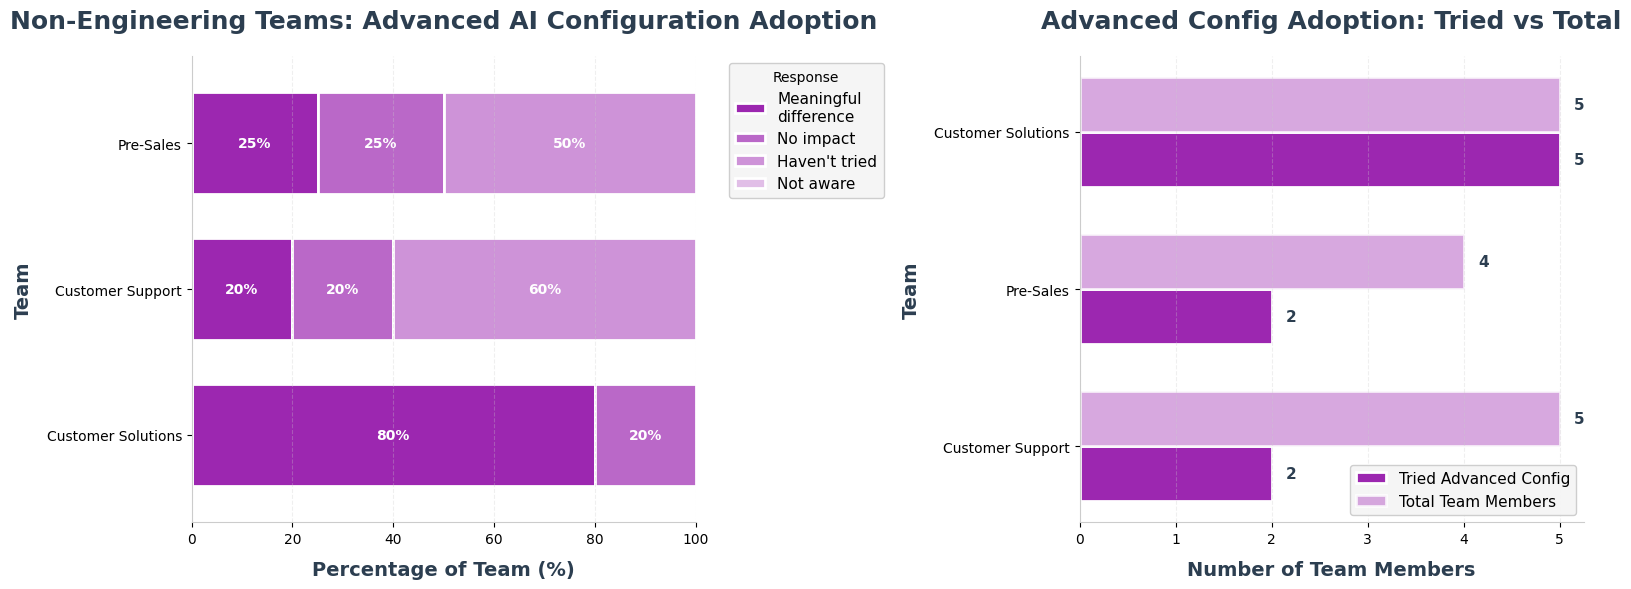


NON-ENGINEERING TEAMS - ADVANCED AI CONFIGURATION (agents.md/.claude)

📊 Total Non-Engineering Team Members: 14

🚀 Adoption by Team:
Team                      Tried It   Total    % Tried    Found Helpful  
Customer Solutions        5          5        100      % 4              
Customer Support          2          5        40       % 1              
Pre-Sales                 2          4        50       % 1              

📈 Detailed Breakdown by Response:
Team                      Meaningful   No Impact    Haven't Tried   Not Aware   
Customer Solutions        4            1            0               0           
Customer Support          1            1            3               0           
Pre-Sales                 1            1            2               0           

✨ Key Insights:
   • 9 out of 14 non-engineering team members have tried advanced config (64%)
   • Of those who tried, 67% found it made a meaningful difference
   • 0 team members weren't aware this was possible


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../../responses.csv')

# Filter to INCLUDE only non-engineering teams
teams_to_include = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[df['Which team are you a part of?'].isin(teams_to_include)].copy()

# Get column names
team_col = 'Which team are you a part of?'
agents_col = df_filtered.columns[16]  # Column Q - agents.md/.claude usage

print(f"Using agents column: {agents_col}")

# Define agents.md order
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time',
    'No -- I wasn\'t aware that was possible'
]

# Shortened labels
agents_labels_short = [
    'Meaningful\ndifference',
    'No impact',
    'Haven\'t tried',
    'Not aware'
]

# Create crosstab
team_agents_crosstab = pd.crosstab(df_filtered[team_col], df_filtered[agents_col])
team_agents_crosstab = team_agents_crosstab.reindex(columns=agents_order, fill_value=0)

# Calculate percentages for each team
team_agents_pct = team_agents_crosstab.div(team_agents_crosstab.sum(axis=1), axis=0) * 100

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ===== LEFT CHART: Stacked percentage bar chart =====
# Define modern, vibrant color palette (purple to pink gradient)
# Positive responses get vibrant purple/pink, negative get muted tones
colors = ['#9C27B0', '#BA68C8', '#CE93D8', '#E1BEE7']

team_agents_pct.plot(kind='barh', stacked=True, ax=ax1, color=colors, 
                     width=0.7, edgecolor='white', linewidth=2)

ax1.set_xlabel('Percentage of Team (%)', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax1.set_ylabel('Team', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax1.set_title('Non-Engineering Teams: Advanced AI Configuration Adoption', 
              fontsize=18, weight='bold', pad=20, color='#2C3E50')
ax1.legend(agents_labels_short, title='Response', bbox_to_anchor=(1.05, 1), 
           loc='upper left', fontsize=11, framealpha=0.95, 
           edgecolor='#CCCCCC', facecolor='#F5F5F5')
ax1.set_xlim(0, 100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#CCCCCC')
ax1.spines['bottom'].set_color('#CCCCCC')
ax1.grid(axis='x', alpha=0.3, linestyle='--', color='#CCCCCC')

# Add percentage labels on stacked bars
for container in ax1.containers:
    labels = [f'{v:.0f}%' if v > 8 else '' for v in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='center', 
                  fontsize=10, weight='bold', color='white')

# ===== RIGHT CHART: Count bar chart showing "tried it" vs "haven't tried" =====
tried_counts = team_agents_crosstab[agents_order[:2]].sum(axis=1)
total_counts = team_agents_crosstab.sum(axis=1)
tried_pct = (tried_counts / total_counts * 100)

# Sort by tried percentage
sort_order = tried_pct.sort_values(ascending=True).index
tried_counts_sorted = tried_counts[sort_order]
total_counts_sorted = total_counts[sort_order]

x = np.arange(len(sort_order))
width = 0.35

bars1 = ax2.barh(x - width/2, tried_counts_sorted, width, 
                 label='Tried Advanced Config', color='#9C27B0', 
                 edgecolor='white', linewidth=2)
bars2 = ax2.barh(x + width/2, total_counts_sorted, width, 
                 label='Total Team Members', color='#CE93D8', alpha=0.8,
                 edgecolor='white', linewidth=2)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        width_val = bar.get_width()
        if width_val > 0:
            ax2.text(width_val + 0.15, bar.get_y() + bar.get_height()/2, 
                    f'{int(width_val)}', 
                    va='center', fontsize=11, weight='bold', color='#2C3E50')

ax2.set_ylabel('Team', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax2.set_xlabel('Number of Team Members', fontsize=14, weight='bold', color='#2C3E50', labelpad=10)
ax2.set_title('Advanced Config Adoption: Tried vs Total', fontsize=18, weight='bold', pad=20, color='#2C3E50')
ax2.set_yticks(x)
ax2.set_yticklabels(sort_order)
ax2.legend(fontsize=11, framealpha=0.95, edgecolor='#CCCCCC', facecolor='#F5F5F5')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#CCCCCC')
ax2.spines['bottom'].set_color('#CCCCCC')
ax2.grid(axis='x', alpha=0.3, linestyle='--', color='#CCCCCC')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("NON-ENGINEERING TEAMS - ADVANCED AI CONFIGURATION (agents.md/.claude)")
print("="*80)

print(f"\n📊 Total Non-Engineering Team Members: {len(df_filtered)}")

print(f"\n🚀 Adoption by Team:")
print(f"{'Team':<25} {'Tried It':<10} {'Total':<8} {'% Tried':<10} {'Found Helpful':<15}")
print("="*80)

for team in team_agents_crosstab.index:
    tried = team_agents_crosstab.loc[team, agents_order[:2]].sum()
    total = team_agents_crosstab.loc[team].sum()
    pct_tried = (tried / total * 100) if total > 0 else 0
    found_helpful = team_agents_crosstab.loc[team, agents_order[0]] if agents_order[0] in team_agents_crosstab.columns else 0
    
    print(f"{team:<25} {int(tried):<10} {int(total):<8} {pct_tried:<9.0f}% {int(found_helpful):<15}")

print(f"\n📈 Detailed Breakdown by Response:")
haven_tried_label = "Haven't Tried"
print(f"{'Team':<25} {'Meaningful':<12} {'No Impact':<12} {haven_tried_label:<15} {'Not Aware':<12}")
print("="*80)

for team in team_agents_crosstab.index:
    row = team_agents_crosstab.loc[team]
    print(f"{team:<25} {int(row.get(agents_order[0], 0)):<12} "
          f"{int(row.get(agents_order[1], 0)):<12} "
          f"{int(row.get(agents_order[2], 0)):<15} "
          f"{int(row.get(agents_order[3], 0)):<12}")

# Calculate overall stats
total_tried = team_agents_crosstab[agents_order[:2]].sum().sum()
total_members = team_agents_crosstab.sum().sum()
overall_tried_pct = (total_tried / total_members * 100)

meaningful_diff = team_agents_crosstab[agents_order[0]].sum()
helpful_pct = (meaningful_diff / total_tried * 100) if total_tried > 0 else 0

print(f"\n✨ Key Insights:")
print(f"   • {int(total_tried)} out of {int(total_members)} non-engineering team members have tried advanced config ({overall_tried_pct:.0f}%)")
print(f"   • Of those who tried, {helpful_pct:.0f}% found it made a meaningful difference")
print(f"   • {int(team_agents_crosstab[agents_order[3]].sum())} team members weren't aware this was possible")

# Compare to engineering if available
eng_teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_eng = df[~df['Which team are you a part of?'].isin(eng_teams_to_exclude)].copy()
eng_tried = len(df_eng[df_eng[agents_col].isin(agents_order[:2])])
eng_total = len(df_eng)
eng_tried_pct = (eng_tried / eng_total * 100) if eng_total > 0 else 0

print(f"\n🔍 Non-Engineering vs Engineering Comparison:")
print(f"   • Non-Engineering: {overall_tried_pct:.0f}% have tried advanced config")
print(f"   • Engineering: {eng_tried_pct:.0f}% have tried advanced config")
if overall_tried_pct > eng_tried_pct:
    print(f"   • Non-engineering teams are AHEAD in advanced configuration adoption!")
elif overall_tried_pct < eng_tried_pct:
    print(f"   • Engineering teams lead in advanced config adoption")
    print(f"   • Opportunity: Share engineers' agents.md practices with customer-facing teams")
else:
    print(f"   • Both groups have similar adoption rates")

# Identify champion team
if len(team_agents_crosstab) > 0:
    champion_team = (team_agents_crosstab[agents_order[:2]].sum(axis=1) / team_agents_crosstab.sum(axis=1)).idxmax()
    champion_pct = (team_agents_crosstab.loc[champion_team, agents_order[:2]].sum() / team_agents_crosstab.loc[champion_team].sum() * 100)
    print(f"\n   🏆 Champion Team: {champion_team} ({champion_pct:.0f}% adoption)")

print("\n" + "="*80 + "\n")